# Projet 5 :
# Segmentez des clients d'un site e-commerce

## III) Notebook de simulation :
Notebook de simulation pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import *
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from geopy.distance import distance
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from math import pi
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import QuantileTransformer

In [2]:
# Chargement du jeu de données df
df = pd.read_csv('df.csv', sep=',')
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,latitude_client,longitude_client,latitude_vendeur,longitude_vendeur,Rapidité_livraison,récence
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,office_furniture,8577.0,itaquaquecetuba,SP,-20.498489,-47.396929,-23.486111,-46.366721,10.0,519
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,housewares,88303.0,itajai,SC,-23.727992,-46.542848,-26.912574,-48.673980,7.0,277
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,office_furniture,8577.0,itaquaquecetuba,SP,-23.531642,-46.656289,-23.486111,-46.366721,-2.0,151
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,office_furniture,8577.0,itaquaquecetuba,SP,-23.499702,-46.185233,-23.486111,-46.366721,12.0,218
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,home_confort,14940.0,ibitinga,SP,-22.975100,-47.142925,-21.757321,-48.829744,5.0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,books_general_interest,17400.0,garca,SP,-23.586003,-46.499638,-22.211471,-49.658625,11.0,193
119139,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,sports_leisure,14802.0,araraquara,SP,-23.615830,-46.768533,-21.772226,-48.180222,8.0,196
119140,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,health_beauty,3304.0,sao paulo,SP,-3.734569,-38.510534,-23.545148,-46.578130,-8.0,191
119141,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,watches_gifts,14840.0,guariba,SP,-29.949839,-51.168494,-21.363502,-48.229601,18.0,347


In [3]:
# Chargement du jeu de données df_group
df_group = pd.read_csv('df_group.csv', sep=',')
df_group

,customer_unique_id,customer_id_nunique,customer_city_last,customer_state_last,customer_zip_code_prefix_last,order_id_nunique,order_id_count,récence_mean,Rapidité_livraison_mean,order_status_last,...,freight_value_mean,seller_id_last,seller_zip_code_prefix_last,seller_city_last,seller_state_last,latitude_client_mean,longitude_client_mean,latitude_vendeur_mean,longitude_vendeur_mean,%_frais_livraison
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,cajamar,SP,7787.0,1.0,1.0,160.0,4.0,delivered,...,12.00,da8622b14eb17ae2831f4ac5b9dab84a,13405.0,piracicaba,SP,-23.340235,-46.830140,-22.708702,-47.664701,9.237875
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,osasco,SP,6053.0,1.0,1.0,163.0,4.0,delivered,...,8.29,138dbe45fc62f1e244378131a6801526,2215.0,sao paulo,SP,-23.559115,-46.787626,-23.490759,-46.583369,43.862434
2,0000f46a3911fa3c0805444483337064,1.0,sao jose,SC,88115.0,1.0,1.0,585.0,1.0,delivered,...,17.22,3d871de0142ce09b7081e2b9d1733cb1,13232.0,campo limpo paulista,SP,-27.542880,-48.633426,-23.211746,-46.762875,24.956522
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,belem,PA,66812.0,1.0,1.0,369.0,11.0,delivered,...,17.63,ef506c96320abeedfb894c34db06f478,3569.0,sao paulo,SP,-1.312214,-48.483159,-23.543150,-46.490101,67.833782
4,0004aac84e0df4da2b147fca70cf8255,1.0,sorocaba,SP,18040.0,1.0,1.0,336.0,7.0,delivered,...,16.89,70a12e78e608ac31179aea7f8422044b,12327.0,jacarei,SP,-23.505548,-47.469705,-23.302318,-45.971888,9.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,1.0,sanharo,PE,55250.0,1.0,2.0,495.0,26.0,delivered,...,248.71,17f51e7198701186712e53a39c564617,3908.0,sao paulo,SP,-8.362511,-36.562343,-23.582519,-46.507194,31.682803
96092,fffea47cd6d3cc0a88bd621562a9d061,1.0,feira de santana,BA,44054.0,1.0,1.0,310.0,2.0,delivered,...,19.69,7aa4334be125fcdd2ba64b3180029f14,18500.0,laranjal paulista,SP,-12.217395,-38.959308,-23.049552,-47.837621,30.343658
96093,ffff371b4d645b6ecea244b27531430a,1.0,sinop,MT,78552.0,1.0,1.0,617.0,29.0,delivered,...,22.56,54aa8463e87776b5612f4bdc4bd5d4de,30550.0,belo horizonte,MG,-11.834552,-55.508110,-19.943615,-43.981847,25.094549
96094,ffff5962728ec6157033ef9805bacc48,1.0,bom jesus do norte,ES,29460.0,1.0,1.0,168.0,13.0,delivered,...,18.69,7d13fca15225358621be4086e1eb0964,14050.0,ribeirao preto,SP,-21.126568,-41.672806,-21.172861,-47.823700,16.252174


In [4]:
df_group['order_purchase_timestamp_first'] = pd.to_datetime(df_group['order_purchase_timestamp_first'])
data = df_group.loc[:, ['récence_mean', 'customer_id_nunique', 'payment_value_sum', 'review_score_mean']]\
.rename(columns={'récence_mean': 'Recency',
                 'customer_id_nunique': 'Frequency',
                 'payment_value_sum': 'MonetaryValue',
                 'review_score_mean': 'Satisfaction'})
data

,Recency,Frequency,MonetaryValue,Satisfaction
0,160.0,1.0,141.90,5.0
1,163.0,1.0,27.19,4.0
2,585.0,1.0,86.22,3.0
3,369.0,1.0,43.62,4.0
4,336.0,1.0,196.89,5.0
...,...,...,...,...
96091,495.0,1.0,4134.84,5.0
96092,310.0,1.0,84.58,4.0
96093,617.0,1.0,112.46,5.0
96094,168.0,1.0,133.69,5.0


In [5]:
data.Frequency.unique()

array([ 1.,  2.,  3.,  4.,  6.,  7.,  5.,  9., 17.])

### Fréquence nécessaire de mise à jour du modèle de segmentation.
### Recency	| Frequency	| MonetaryValue	| Satisfaction
### Normalisation avec QuantileTransformer

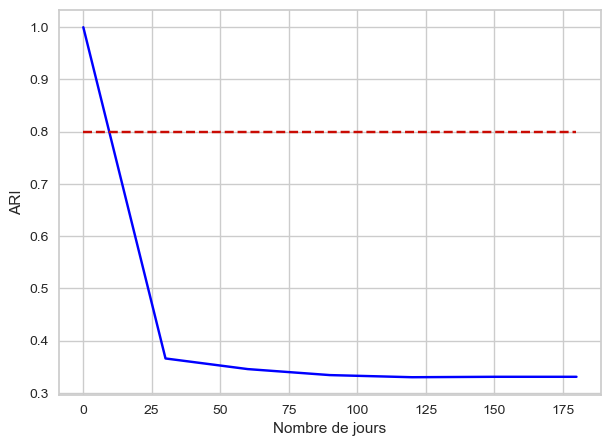

In [6]:
# Initialisation des paramètres

# Définition de la valeur de seuil à 0.80
seuil = 0.80 

# pas entre deux calculs des valeurs ARI
pas = 30 

# date d'initialisation le modèle initial
t0 = 180

# nombre de jours 
nbr_jours = t0 

# selectionner les clients qui ont commandé partir de t0
data_client0 = data[data['Recency'] > t0].copy()

# Normalisation avec QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
data_client0[['Recency', 'MonetaryValue']] = quantile_transformer.\
fit_transform(data_client0[['Recency', 'MonetaryValue']])

# définir le model0
model0 = KMeans(n_clusters=3, random_state=0)

# entraînement du model0 avec les données data_client0
model0.fit(data_client0)

# liste pour les valeurs d'ARI
ari = []

#  ajouter les clients à chaque pas
jours = np.arange(0, nbr_jours+1, pas)
for j in jours:
    # Ajouter les clients à partir de t0
    data_client1 = data[data['Recency'] > t0 - j].copy()

    # Normalisation avec QuantileTransformer
    data_client1[['Recency', 'MonetaryValue']] = quantile_transformer.\
    transform(data_client1[['Recency', 'MonetaryValue']])

    # Clustering avec le modèle initial
    seg0 = model0.predict(data_client1)

    # On entraîne un nouveau modèle.
    model1 = KMeans(n_clusters=3, random_state=0)
    
    # entraînement du model1 avec les données data_client1
    model1.fit(data_client1)
    
    # recupérer les labels
    seg1 = model1.labels_

     # Calculer l'ARI entre seg0 et seg1
    ari_value = metrics.cluster.adjusted_rand_score(seg0, seg1)

    # Ajouter la valeur d'ARI à la liste ari
    ari.append(ari_value)
    
# Conversion de la liste ari en un tableau numpy
ari = np.array(ari)

# Visualisation des résultats 
fig, ax = plt.subplots(figsize=(7,5))
ax.set_xlabel('Nombre de jours')
ax.set_ylabel('ARI')
ax.plot(jours, ari, color='blue')

# Ligne en pointillés pour la valeur seuil de l'ARI
ax.plot(jours, np.zeros(jours.shape)+seuil, '--', color='r')

plt.show()



### Normalisation avec StandardScaler

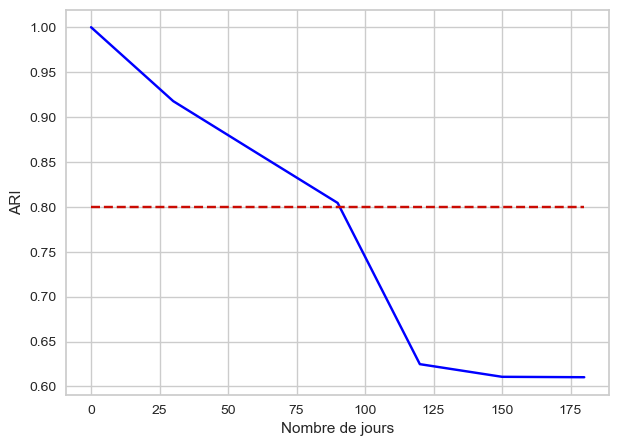

In [7]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialisation des paramètres

# Définition de la valeur de seuil à 0.80
seuil = 0.80 

# pas entre deux calculs des valeurs ARI
pas = 30 

# date d'initialisation le modèle initial
t0 = 180

# nombre de jours 
nbr_jours = t0 

# Sélectionner les clients qui ont commandé partir de t0
data_client0 = data[data['Recency'] > t0].copy()

# Normalisation avec StandardScaler
scaler = StandardScaler()
data_client0[['Recency', 'MonetaryValue']] = \
scaler.fit_transform(data_client0[['Recency', 'MonetaryValue']])

# Définir le modèle initial
model0 = KMeans(n_clusters=3, random_state=0)

# entraînement du model0 avec les données data_client0
model0.fit(data_client0)

# Liste pour les valeurs d'ARI
ari = []

# Ajouter les clients à chaque pas
jours = np.arange(0, nbr_jours+1, pas)
for j in jours:
    # Ajouter les clients à partir de t0
    data_client1 = data[data['Recency'] > t0 - j].copy()

    # Normalisation avec StandardScaler
    data_client1[['Recency', 'MonetaryValue']] = \
    scaler.transform(data_client1[['Recency', 'MonetaryValue']])

    # Clustering avec le modèle initial
    seg0 = model0.predict(data_client1)

    # On entraîne un nouveau modèle.
    model1 = KMeans(n_clusters=3, random_state=0)
    
    # entraînement du model1 avec les données data_client1
    model1.fit(data_client1)
    
    # Recupérer les labels des clients
    seg1 = model1.labels_

     # Calculer l'ARI entre seg0 et seg1
    ari_value = metrics.cluster.adjusted_rand_score(seg0, seg1)

    # Ajouter la valeur d'ARI à la liste ari
    ari.append(ari_value)

# Conversion de la liste ari en un tableau numpy
ari = np.array(ari)

# Visualisation des résultats 
fig, ax = plt.subplots(figsize=(7,5))
ax.set_xlabel('Nombre de jours')
ax.set_ylabel('ARI')
ax.plot(jours, ari, color='blue')

# Ligne en pointillés pour la valeur seuil de l'ARI
ax.plot(jours, np.zeros(jours.shape)+seuil, '--', color='r')


plt.show()


### Recency	| Frequency	| MonetaryValue| Satisfaction | Rapidité_livraison_mean
### Normalisation avec QuantileTransformer

In [8]:
df_group['order_purchase_timestamp_first'] = pd.to_datetime(df_group['order_purchase_timestamp_first'])
data = df_group.loc[:, ['récence_mean', 'customer_id_nunique', 'payment_value_sum', 'review_score_mean', 'Rapidité_livraison_mean']]\
.rename(columns={'récence_mean': 'Recency',
                 'customer_id_nunique': 'Frequency',
                 'payment_value_sum': 'MonetaryValue',
                 'review_score_mean': 'Satisfaction'})
data

,Recency,Frequency,MonetaryValue,Satisfaction,Rapidité_livraison_mean
0,160.0,1.0,141.90,5.0,4.0
1,163.0,1.0,27.19,4.0,4.0
2,585.0,1.0,86.22,3.0,1.0
3,369.0,1.0,43.62,4.0,11.0
4,336.0,1.0,196.89,5.0,7.0
...,...,...,...,...,...
96091,495.0,1.0,4134.84,5.0,26.0
96092,310.0,1.0,84.58,4.0,2.0
96093,617.0,1.0,112.46,5.0,29.0
96094,168.0,1.0,133.69,5.0,13.0


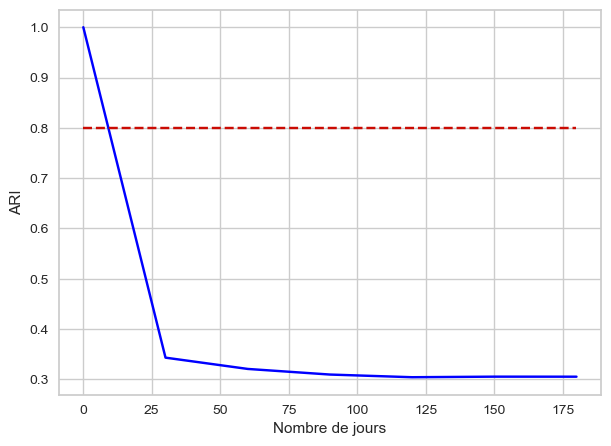

In [9]:
# Initialisation des paramètres

# Définition de la valeur de seuil à 0.80
seuil = 0.80 

# pas entre deux calculs des valeurs ARI
pas = 30 

# date d'initialisation le modèle initial
t0 = 180

# nombre de jours 
nbr_jours = t0 

# selectionner les clients qui ont commandé partir de t0
data_client0 = data[data['Recency'] > t0].copy()

# Normalisation avec QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
data_client0[['Recency', 'MonetaryValue', 'Rapidité_livraison_mean']] = \
quantile_transformer.fit_transform(data_client0[['Recency', 'MonetaryValue', 'Rapidité_livraison_mean']])

# définir le model0
model0 = KMeans(n_clusters=3, random_state=0)

# entraînement du model0 avec les données data_client0
model0.fit(data_client0)

# liste pour les valeurs d'ARI
ari = []

#  ajouter les clients à chaque pas
jours = np.arange(0, nbr_jours+1, pas)
for j in jours:
    # Ajouter les clients à partir de t0
    data_client1 = data[data['Recency'] > t0 - j].copy()

    # Normalisation avec QuantileTransformer
    data_client1[['Recency', 'MonetaryValue', 'Rapidité_livraison_mean']] = \
    quantile_transformer.transform(data_client1[['Recency', 'MonetaryValue', 'Rapidité_livraison_mean']])

    # Clustering avec le modèle initial
    seg0 = model0.predict(data_client1)

    # On entraîne un nouveau modèle.
    model1 = KMeans(n_clusters=3, random_state=0)
    
    # entraînement du model1 avec les données data_client1
    model1.fit(data_client1)
    
    # recupérer les labels
    seg1 = model1.labels_

    # Calculer l'ARI entre seg0 et seg1
    ari_value = metrics.cluster.adjusted_rand_score(seg0, seg1)

    # Ajouter la valeur d'ARI à la liste ari
    ari.append(ari_value)

# Conversion de la liste ari en un tableau numpy
ari = np.array(ari)

# Visualisation des résultats 
fig, ax = plt.subplots(figsize=(7,5))
ax.set_xlabel('Nombre de jours')
ax.set_ylabel('ARI')
ax.plot(jours, ari, color='blue')

# Ligne en pointillés pour la valeur seuil de l'ARI
ax.plot(jours, np.zeros(jours.shape)+seuil, '--', color='r')
plt.show()


### Normalisation avec StandardScaler

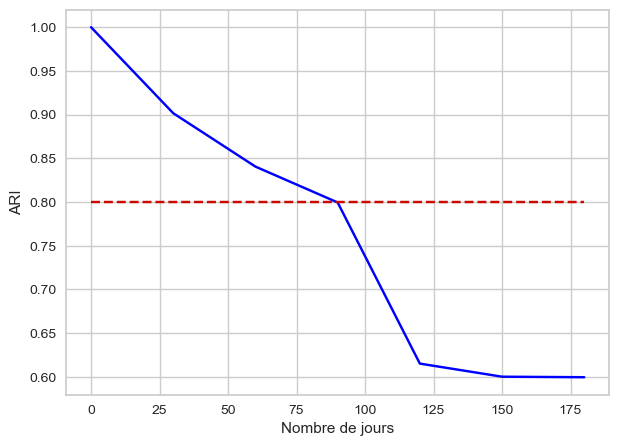

In [10]:
# Initialisation des paramètres

# Définition de la valeur de seuil à 0.80
seuil = 0.80 

# pas entre deux calculs des valeurs ARI
pas = 30 

# date d'initialisation le modèle initial
t0 = 180

# nombre de jours 
nbr_jours = t0 

# Sélectionner les clients qui ont commandé partir de t0
data_client0 = data[data['Recency'] > t0].copy()

# Normalisation avec StandardScaler
scaler = StandardScaler()
data_client0[['Recency', 'MonetaryValue', 'Rapidité_livraison_mean']] = \
scaler.fit_transform(data_client0[['Recency', 'MonetaryValue', 'Rapidité_livraison_mean']])

# Définir le modèle initial
model0 = KMeans(n_clusters=3, random_state=0)

# entraînement du model0 avec les données data_client0
model0.fit(data_client0)

# Liste pour les valeurs d'ARI
ari = []

# Ajouter les clients à chaque pas
jours = np.arange(0, nbr_jours+1, pas)
for j in jours:
    # Ajouter les clients à partir de t0
    data_client1 = data[data['Recency'] > t0 - j].copy()

    # Normalisation avec StandardScaler
    data_client1[['Recency', 'MonetaryValue', 'Rapidité_livraison_mean']] = \
    scaler.transform(data_client1[['Recency', 'MonetaryValue', 'Rapidité_livraison_mean']])

    # Clustering avec le modèle initial
    seg0 = model0.predict(data_client1)

    # On entraîne un nouveau modèle.
    model1 = KMeans(n_clusters=3, random_state=0)
    model1.fit(data_client1)
    
    # Recupérer les labels
    seg1 = model1.labels_

    # Calculer l'ARI entre seg0 et seg1
    ari_value = metrics.cluster.adjusted_rand_score(seg0, seg1)

    # Ajouter la valeur d'ARI à la liste ari
    ari.append(ari_value)

# Conversion de la liste ari en un tableau numpy
ari = np.array(ari)

# Visualisation des résultats 
fig, ax = plt.subplots(figsize=(7,5))
ax.set_xlabel('Nombre de jours')
ax.set_ylabel('ARI')
ax.plot(jours, ari, color='blue')

# Ligne en pointillés pour la valeur seuil de l'ARI
ax.plot(jours, np.zeros(jours.shape)+seuil, '--', color='r')

plt.show()


Après avoir analysé les résultats obtenus, nous avons constaté que l'indice ARI diminue progressivement au fil du temps, ce qui indique une diminution de la précision du modèle de segmentation. Nous avons également remarqué que cette diminution de précision se produit plus rapidement dans les premiers jours après l'initialisation du modèle, puis ralentit après environ 90 jours.

Cela suggère que le modèle de segmentation doit être mis à jour périodiquement pour maintenir une précision suffisante dans la segmentation des clients. En pratique, cela pourrait signifier que les spécialistes du marketing devraient réexaminer et mettre à jour leur modèle de segmentation tous les 90 jours ou plus, en fonction de l'objectif de l'entreprise et des données disponibles. Cela garantira que les efforts de marketing sont ciblés sur les bons groupes de clients et que les résultats obtenus sont optimaux.